In [1]:
# pandas
import pandas as pd
# from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# jupyter notebook
%matplotlib inline

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# check input data
import os
print(os.listdir('./input'))

['.DS_Store', 'test.csv', 'submission.csv', 'GBoost.csv', 'KNN.csv', 'Lasso.csv', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv', 'GidSearch.csv']


In [2]:
# load date with continous counting Id 
train = pd.read_csv('./input/train.csv', index_col='Id')
test  = pd.read_csv('./input/test.csv',  index_col='Id')

print(train.shape)
display(train.head())

print(test.shape)
display(test.head())

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Skew is: 1.8828757597682129


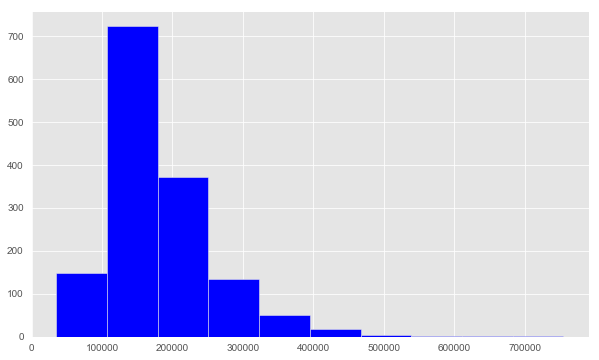

In [3]:
# matplot flat style 
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)   #size
# plt.rcParams['savefig.dpi']  = 300       #pixel
# plt.rcParams['figure.dpi']   = 300       #resolution
train.head(5)
train.SalePrice.describe()
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [4]:
# select numeric features
numeric_feature = train.select_dtypes(include=[np.number])
numeric_feature.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [5]:
# analyse features correlated with each other
corr = numeric_feature.corr()
# select features corr-to SalePrice 
print(corr['SalePrice'].sort_values(ascending=False)[1:11], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64 

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [6]:
# How many unique features
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [7]:
# Pivot and plot the intended aggregate function
def pivotandplot(data, variable, onVariable, aggfunc):
    pivot_var = data.pivot_table(index   = variable,
                                 values  = onVariable,
                                 aggfunc = aggfunc)
    pivot_var.plot(kind='bar', color='blue')
    plt.xlabel(variable)
    plt.ylabel(onVariable)
    plt.xticks(rotation=0) #xlabel rotation angle
    plt.show()

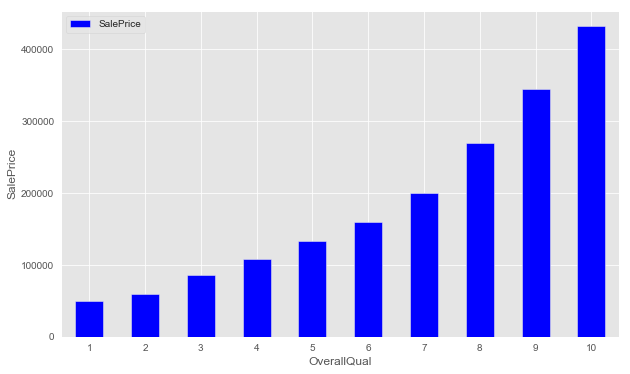

In [8]:
pivotandplot(train, 'OverallQual', 'SalePrice', np.median)

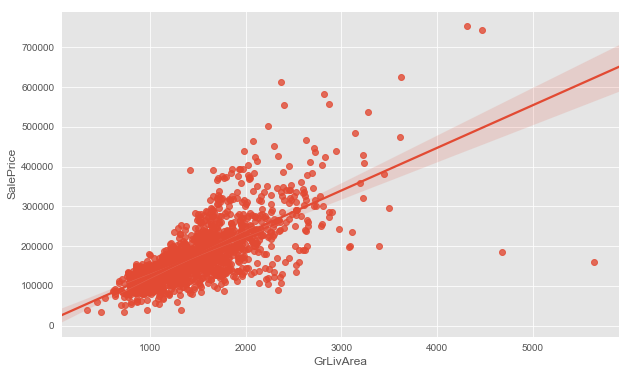

In [9]:
_ = sns.regplot(train['GrLivArea'], train['SalePrice'])

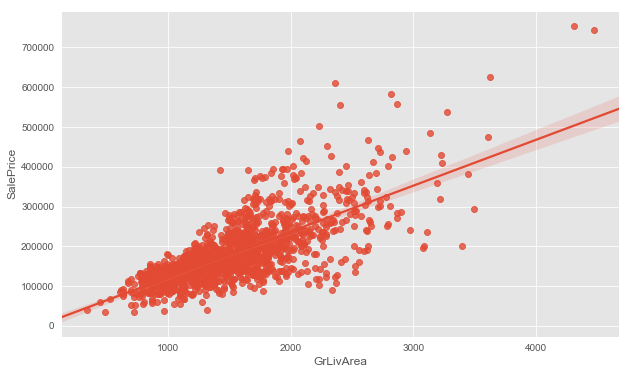

In [10]:
# Remove the outliers(2 points in rightdown corner)
train = train.drop(train[(train['GrLivArea']>4000) & 
                         (train['SalePrice']<300000)].index)
_ = sns.regplot(train['GrLivArea'], train['SalePrice'])

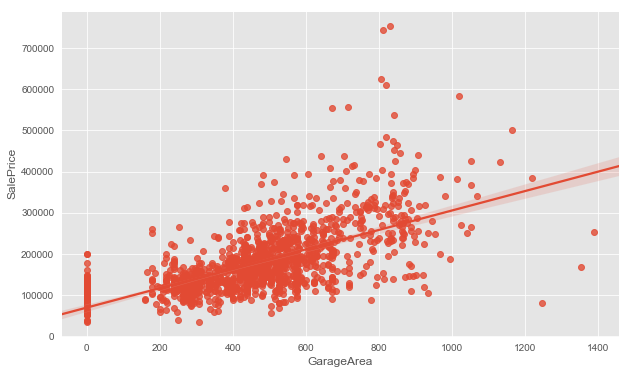

In [11]:
_ = sns.regplot(train['GarageArea'], train['SalePrice'])

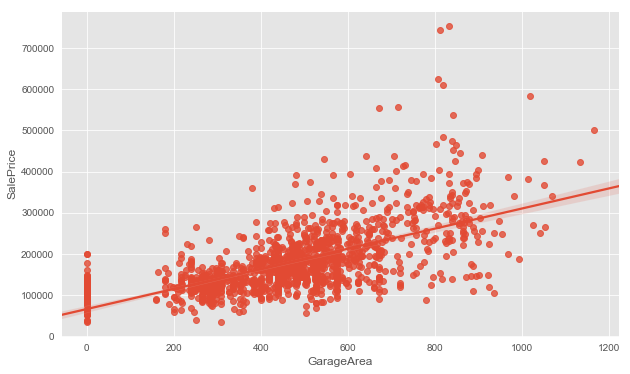

In [12]:
train = train[train['GarageArea']<1200]
_ = sns.regplot(train['GarageArea'], train['SalePrice'])
# Do not delete data with 0 GarageArea

### Impute the Data for missing values
* Before imputing the categorical values it is very important that we impute it on entire (Dev + Test)
* This is of outmost importance since some of the categories might be missing in the test data  which will create problems in OneHotEncoding later when we run models on test data

In [13]:
# Merge train and text data
# get the ln of SalePrice, +1 because ln0 is illogical
train['log_SalePrice'] = np.log(train['SalePrice']+1)
# 2-dimension array use double []
salePrices = train[['SalePrice', 'log_SalePrice']]
salePrices.head()

,SalePrice,log_SalePrice
Id,,
1,208500,12.247699
2,181500,12.109016
3,223500,12.317171
4,140000,11.849405
5,250000,12.429220


In [14]:
# make sure the features are the same in two dataset
train = train.drop(columns=['SalePrice', 'log_SalePrice'])
print(train.shape)
print(test.shape)

(1454, 79)
(1459, 79)


In [15]:
all_data = pd.concat((train, test))
print(all_data.shape)
all_data.head()

(2913, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [16]:
# processing null data
null_data = pd.DataFrame(all_data.isnull().sum().
                         sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
PoolQC,2904
MiscFeature,2809
Alley,2715
Fence,2342
FireplaceQu,1419
LotFrontage,485
GarageCond,159
GarageQual,159
GarageYrBlt,159


In [17]:
# get the null percentage
(null_data/len(all_data)) * 100

,Null Count
Feature,
PoolQC,99.691040
MiscFeature,96.429797
Alley,93.202884
Fence,80.398215
FireplaceQu,48.712667
LotFrontage,16.649502
GarageCond,5.458290
GarageQual,5.458290
GarageYrBlt,5.458290


* 99% of Pool Quality Data is missing.In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
* Similar is case for Garage column

But what are the 96% missing Miscelleanous features ?

In [18]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [ ]:
# Impute Categorical features for missing values and relace by 'None'
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'BsmtQual', 
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
# Impute Numerical features for missing values and replace by zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
# mode(): getting the most frequent number, return a df use the 1st
for col in ('MSZoning', 'Electrical', 'KitchenQual', 
            'Exterior1st', 'Exterior2nd', 'SaleType', 
            'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

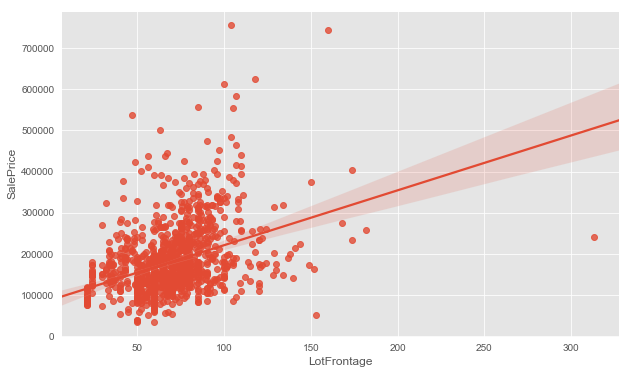

In [ ]:
_ = sns.regplot(train['LotFrontage'], salePrices['SalePrice'])

In [ ]:
# Impute the LotFrontage with Median values
all_data['LotFrontage'] = all_data.groupby('Neighborhood')[
    'LotFrontage'].apply(lambda x: x.fillna(x.median()))

### New Features
* TotalBsmtSF - Total Basement Square Feet
* 1stFlrSF - First Floor Square Feet
* 2ndFlrSF - Second Floor Square Feet

All the above three feature define area of the house and we can easily combine these to form TotalSF - Total Area in square feet

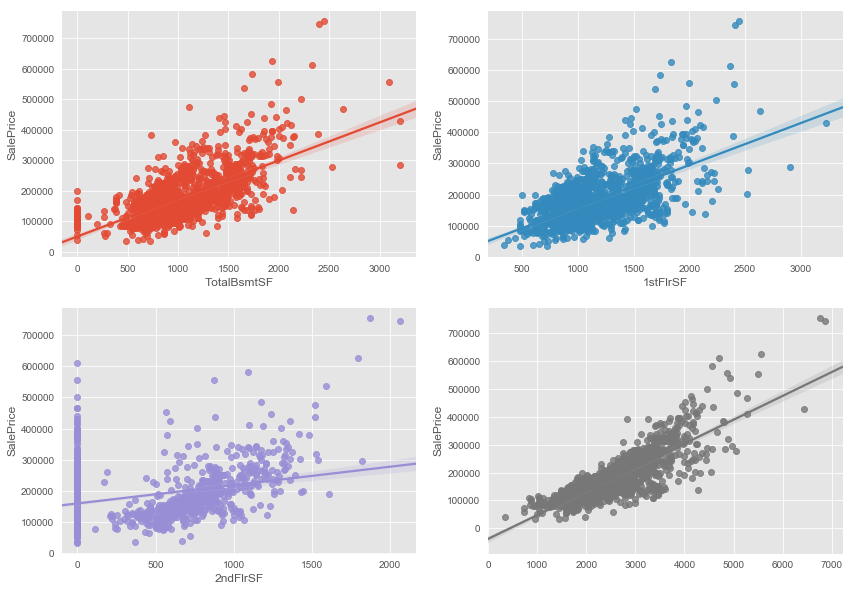

In [ ]:
# check if this thought works
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                                ncols=2)
figure.set_size_inches(14, 10)
_ = sns.regplot(train['TotalBsmtSF'], salePrices['SalePrice'], 
                ax=ax1)
_ = sns.regplot(train['1stFlrSF'], salePrices['SalePrice'], 
                ax=ax2)
_ = sns.regplot(train['2ndFlrSF'], salePrices['SalePrice'], 
                ax=ax3)
_ = sns.regplot(train['TotalBsmtSF']+train['1stFlrSF']+\
                train['2ndFlrSF'], 
                salePrices['SalePrice'], 
                ax=ax4)

In [ ]:
# Impute the entire data set
all_data['TotalSF'] = all_data['TotalBsmtSF'] + \
                      all_data['1stFlrSF'] + \
                      all_data['2ndFlrSF']
# why not drop ???    
    
# Add two new variables for No nd floor and no basement
all_data['No2ndFlr'] = (all_data['2ndFlrSF']==0)
all_data['NoBsmt'] = (all_data['TotalBsmtSF']==0)

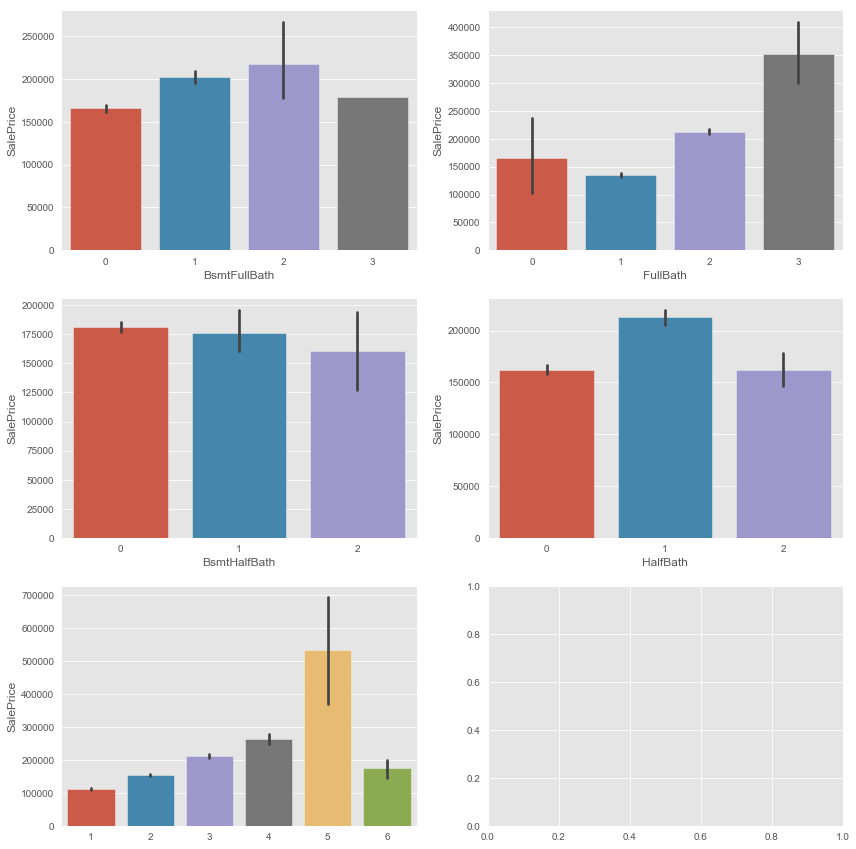

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(14, 15)
_ = sns.barplot(train['BsmtFullBath'], salePrices['SalePrice'], 
                ax=ax1)
_ = sns.barplot(train['FullBath'], salePrices['SalePrice'], 
                ax=ax2)
_ = sns.barplot(train['BsmtHalfBath'], salePrices['SalePrice'], 
                ax=ax3)
_ = sns.barplot(train['HalfBath'], salePrices['SalePrice'], 
                ax=ax4)
_ = sns.barplot(train['BsmtFullBath']+train['FullBath']+train['BsmtHalfBath']+train['HalfBath'], 
                salePrices['SalePrice'], 
                ax=ax5)

In [ ]:
all_data['TotalBath'] = all_data['BsmtFullBath'] + \
                        all_data['FullBath'] + \
                        all_data['BsmtHalfBath'] + \
                        all_data['HalfBath']
# why not drop ??? 

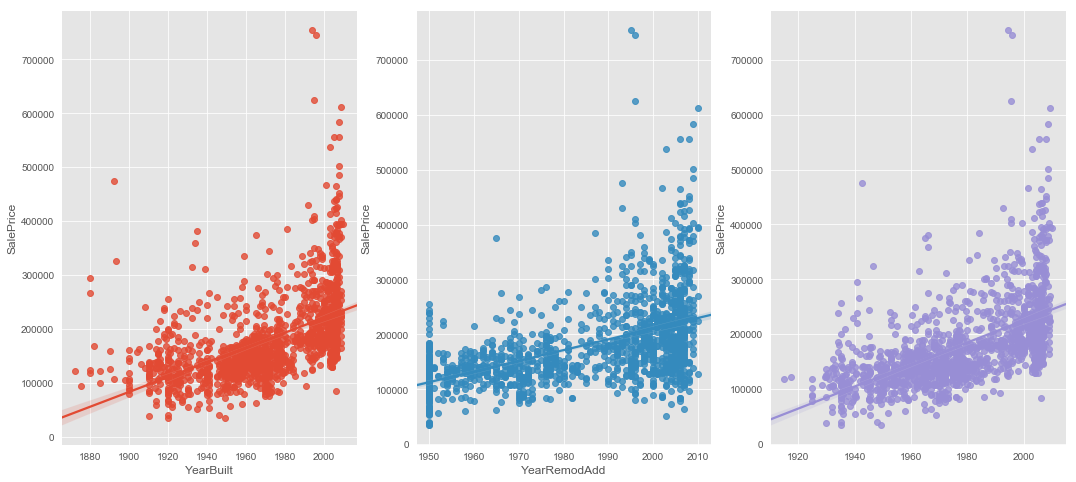

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 8)
_ = sns.regplot(train['YearBuilt'], salePrices['SalePrice'], ax=ax1)
_ = sns.regplot(train['YearRemodAdd'], salePrices['SalePrice'], ax=ax2)
_ = sns.regplot((train['YearBuilt']+train['YearRemodAdd'])/2, 
                salePrices['SalePrice'], ax=ax3)
# why use the average value ???

In [ ]:
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + \
                            all_data['YearRemodAdd']

## Some features dominating is over 97%

['Pave' 'Grvl']
Pave    2902
Grvl      11
Name: Street, dtype: int64


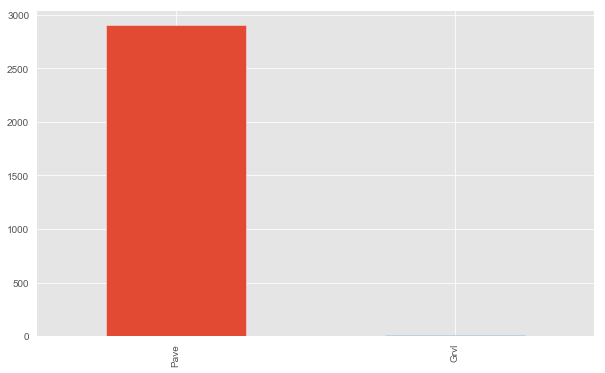

In [ ]:
print(all_data.Street.unique())
print(all_data['Street'].value_counts())
all_data['Street'].value_counts().head(3).plot.bar()

In [ ]:
# Deleting dominating features over 97%
all_data=all_data.drop(columns=['Street','Utilities',
                                'Condition2','RoofMatl',
                                'Heating'])
# why doing this ???

In [ ]:
# treat some numeric values as str which is actually a categorical data
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)

In [ ]:
# I found these features might look better without 0 data. (just like the column '2ndFlrSF' above.)
# why and how you found this ???
all_data['NoLowQual']=(all_data['LowQualFinSF']==0)
all_data['NoOpenPorch']=(all_data['OpenPorchSF']==0)
all_data['NoWoodDeck']=(all_data['WoodDeckSF']==0)
all_data['NoGarage']=(all_data['GarageArea']==0)
# most of the houses has no pools. 
all_data=all_data.drop(columns=['PoolArea','PoolQC'])
# most of the houses has no misc feature.
all_data=all_data.drop(columns=['MiscVal','MiscFeature'])

In [ ]:
# Group the similar featurtes related to a House Feature and analyze
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 
            'BsmtQual', 'BsmtUnfSF','TotalBsmtSF']
Bsmt=all_data[Basement]

In [ ]:
Bsmt['BsmtCond'].unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

In [ ]:
Bsmt.head()

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,TA,No,706.0,0.0,GLQ,Unf,Gd,150.0,856.0
2,TA,Gd,978.0,0.0,ALQ,Unf,Gd,284.0,1262.0
3,TA,Mn,486.0,0.0,GLQ,Unf,Gd,434.0,920.0
4,Gd,No,216.0,0.0,ALQ,Unf,TA,540.0,756.0
5,TA,Av,655.0,0.0,GLQ,Unf,Gd,490.0,1145.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Replacing Categorical values to numbers
cond_encoder = LabelEncoder()
Bsmt['BsmtCond'] = cond_encoder.fit_transform(Bsmt['BsmtCond'])

exposure_encoder = LabelEncoder()
Bsmt['BsmtExposure'] = exposure_encoder.fit_transform(Bsmt['BsmtExposure'])

finTyp1_encoder = LabelEncoder()
Bsmt['BsmtFinType1'] = finTyp1_encoder.fit_transform(Bsmt['BsmtFinType1'])

finTyp2_encoder = LabelEncoder()
Bsmt['BsmtFinType2'] = finTyp2_encoder.fit_transform(Bsmt['BsmtFinType2'])

qual_encoder = LabelEncoder()
Bsmt['BsmtQual'] = qual_encoder.fit_transform(Bsmt['BsmtQual'])

Bsmt.head()

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,4,3,706.0,0.0,2,6,2,150.0,856.0
2,4,1,978.0,0.0,0,6,2,284.0,1262.0
3,4,2,486.0,0.0,2,6,2,434.0,920.0
4,1,3,216.0,0.0,0,6,4,540.0,756.0
5,4,0,655.0,0.0,2,6,2,490.0,1145.0


In [ ]:
# design a function to calculate a score
Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * \
                    Bsmt['BsmtCond'] * \
                    Bsmt['TotalBsmtSF']
all_data['BsmtScore']=Bsmt['BsmtScore']

In [ ]:
Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) \
                + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore']=Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

LotShape: General shape of property

- Reg  Regular 
- IR1  Slightly irregular
- IR2  Moderately Irregular
- IR3  Irregular

LotConfig: Lot configuration

- Inside   Inside lot
- Corner   Corner lot
- CulDSac  Cul-de-sac
- FR2  Frontage on 2 sides of property
- FR3  Frontage on 3 sides of property

In [ ]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]
Lot.head()

,LotFrontage,LotArea,LotConfig,LotShape
Id,,,,
1,65.0,8450,Inside,Reg
2,80.0,9600,FR2,Reg
3,68.0,11250,Inside,IR1
4,60.0,9550,Corner,IR1
5,84.0,14260,FR2,IR1


In [ ]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish',
        'GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
Garage.head()

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
1,548.0,2.0,TA,RFn,TA,Attchd,2003.0
2,460.0,2.0,TA,RFn,TA,Attchd,1976.0
3,608.0,2.0,TA,RFn,TA,Attchd,2001.0
4,642.0,3.0,TA,Unf,TA,Detchd,1998.0
5,836.0,3.0,TA,RFn,TA,Attchd,2000.0


In [ ]:
garcond_encoder = LabelEncoder()
Garage['GarageCond'] = garcond_encoder.fit_transform(
                       Garage['GarageCond'])

garfin_encoder = LabelEncoder()
Garage['GarageFinish'] = garfin_encoder.fit_transform(
                         Garage['GarageFinish'])

garqual_encoder = LabelEncoder()
Garage['GarageQual'] = garqual_encoder.fit_transform(
                       Garage['GarageQual'])

gartyp_encoder = LabelEncoder()
Garage['GarageType'] = gartyp_encoder.fit_transform(
                       Garage['GarageType'])

Garage.head()

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
1,548.0,2.0,5,2,5,1,2003.0
2,460.0,2.0,5,2,5,1,1976.0
3,608.0,2.0,5,2,5,1,2001.0
4,642.0,3.0,5,3,5,5,1998.0
5,836.0,3.0,5,2,5,1,2000.0


In [ ]:
Garage['GarageScore'] = Garage['GarageArea'] * \
                        Garage['GarageCars'] * \
                        Garage['GarageFinish'] * \
                        Garage['GarageQual'] * \
                        Garage['GarageType']
all_data['GarageScore']=Garage['GarageScore']
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,TotalBath,YrBltAndRemod,NoLowQual,NoOpenPorch,NoWoodDeck,NoGarage,BsmtScore,BsmtFinScore,BsmtDNF,GarageScore
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,4.0,4006,True,False,True,False,6848.0,1412.0,False,10960.0
2,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,3.0,3952,True,True,False,False,10096.0,0.0,True,9200.0
3,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,4.0,4003,True,False,True,False,7360.0,972.0,False,12160.0
4,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,2.0,3885,True,False,True,False,3024.0,0.0,True,144450.0
5,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,4.0,4000,True,False,False,False,9160.0,1310.0,False,25080.0


### Data Preprocessesing

In [ ]:
# don't want boolean either
non_numeric = all_data.select_dtypes(exclude=[np.number, bool])
non_numeric.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,2,2008,WD,Normal
2,20,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,TA,TA,Y,None,5,2007,WD,Normal
3,60,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,9,2008,WD,Normal
4,70,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,TA,TA,Y,None,2,2006,WD,Abnorml
5,60,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,12,2008,WD,Normal


In [ ]:
# encode function
def onehot(col_list):
    global all_data
    while len(col_list) != 0:
        # return column 0
        col = col_list.pop(0)
        # convert(encode) categorical date into dummy data 
        data_encoded = pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)

In [ ]:
# list function return the features name list
onehot(list(non_numeric))

(2913, 308)


In [ ]:
def log_transform(col_list):
    transformed_col = []
    while len(col_list) != 0:
        col = col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col] = np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f'{len(transformed_col)} features had been transformed')
    print(all_data.shape)

In [ ]:
numeric=all_data.select_dtypes(include=np.number)
log_transform(list(numeric))

255 features had been transformed
(2913, 308)


In [ ]:
print(train.shape)
print(test.shape)
train = all_data[:len(train)]
test = all_data[len(train):]
print(train.shape)
print(test.shape)

(1454, 79)
(1459, 79)
(1454, 308)
(1459, 308)


### Modeling

In [ ]:
# loading pakages for model. 
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn import linear_model, model_selection, ensemble, preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

#Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score,mean_absolute_error

In [ ]:
def rmse(predict, actual):
    score = mean_squared_error(Ytrain, y_pred) ** 0.5
    return score
rmse_score = make_scorer(rmse)

feature_names = list(all_data)
Xtrain = train[feature_names]
Xtest  = test[feature_names]
Ytrain = salePrices['log_SalePrice']

def score(model):
    score = cross_val_score(model, Xtrain, Ytrain, cv=5, 
                            scoring=rmse_score).mean()
    return score

scores = {}

#### Simple Linear Regression

In [ ]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(Xtrain, Ytrain)

#accuracies = cross_val_score(estimator=lr_model,
                         #   X=Xtrain,
                         #   y=Ytrain,
                          #  cv=5,
                          #  verbose=1)
                
y_pred = lr_model.predict(Xtrain)

print('')
print('####### Linear Regression #######')
meanCV = score(lr_model)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'OLS':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### Linear Regression #######
Mean CV Score : 0.0890

MSE(RSS)    : 0.0079 
MAE         : 0.0621 
RMSE        : 0.0890 
R2          : 0.9503 


#### Lasso Regression

In [ ]:
model_lasso = Lasso(random_state=42, alpha=0.00035)
lr_lasso = make_pipeline(RobustScaler(), model_lasso)
lr_lasso.fit(Xtrain, Ytrain)

y_pred = lr_lasso.predict(Xtrain)

print('')
print('####### Lasso Regression #######')
meanCV = score(lr_lasso)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'Lasso':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### Lasso Regression #######
Mean CV Score : 0.0982

MSE(RSS)    : 0.0096 
MAE         : 0.0683 
RMSE        : 0.0982 
R2          : 0.9394 


#### Ridge Regression

In [ ]:
lr_ridge = make_pipeline(RobustScaler(), 
                         Ridge(random_state=42,alpha=0.002))
lr_ridge.fit(Xtrain,Ytrain)

y_pred = lr_ridge.predict(Xtrain)

print('')
print('####### Ridge Regression #######')
meanCV = score(lr_ridge)
print('Mean CV Score : %.4f' % meanCV)


mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'Ridge':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### Ridge Regression #######
Mean CV Score : 0.0890

MSE(RSS)    : 0.0079 
MAE         : 0.0621 
RMSE        : 0.0890 
R2          : 0.9503 


#### ElasticNet Regression

In [ ]:
lr_elasticnet = make_pipeline(RobustScaler(),
                              ElasticNet(alpha=0.02, l1_ratio=0.7,random_state=42))
lr_elasticnet.fit(Xtrain,Ytrain)

y_pred = lr_elasticnet.predict(Xtrain)

print('')
print('####### ElasticNet Regression #######')
meanCV = score(lr_elasticnet)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'ElasticNet':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### ElasticNet Regression #######
Mean CV Score : 0.1355

MSE(RSS)    : 0.0183 
MAE         : 0.0951 
RMSE        : 0.1355 
R2          : 0.8847 


#### KNN Regression

In [ ]:
knn = make_pipeline(RobustScaler(),KNeighborsRegressor())
knn.fit(Xtrain,Ytrain)

y_pred = knn.predict(Xtrain)

print('')
print('####### KNN Regression #######')
meanCV = score(knn)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'KNN':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### KNN Regression #######
Mean CV Score : 0.1387

MSE(RSS)    : 0.0192 
MAE         : 0.0978 
RMSE        : 0.1387 
R2          : 0.8791 


#### GradientBoosting Regression

In [ ]:
model_GBoost = GradientBoostingRegressor(n_estimators=3000, 
                                         learning_rate=0.05,
                                         max_depth=4, 
                                         max_features='sqrt',
                                         min_samples_leaf=15, 
                                         min_samples_split=10,
                                         loss='huber', 
                                         random_state =42)
model_GBoost.fit(Xtrain,Ytrain)

y_pred = model_GBoost.predict(Xtrain)

print('')
print('####### GradientBoosting Regression #######')
meanCV = score(model_GBoost)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'GradientBoosting':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### GradientBoosting Regression #######
Mean CV Score : 0.0495

MSE(RSS)    : 0.0025 
MAE         : 0.0181 
RMSE        : 0.0495 
R2          : 0.9846 


#### RandomForest Regressor

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(Xtrain, Ytrain)

y_pred = forest_reg.predict(Xtrain)

print('')
print('####### RandomForest Regression #######')
meanCV = score(forest_reg)
print('Mean CV Score : %.4f' % meanCV)


mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'RandomForest':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### RandomForest Regression #######
Mean CV Score : 0.0609

MSE(RSS)    : 0.0037 
MAE         : 0.0403 
RMSE        : 0.0609 
R2          : 0.9767 


#### Grid Search for finding best params for RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [70,100], 'max_features': [150]},
    {'bootstrap': [True], 'n_estimators': [70,100], 
     'max_features': [150]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(Xtrain, Ytrain)

y_pred = grid_search.predict(Xtrain) #???? missing

print('')
print('####### GridSearch RF Regression #######')
meanCV = score(grid_search)
print('Mean CV Score : %.4f' % meanCV)

mse = mean_squared_error(Ytrain,y_pred)
mae = mean_absolute_error(Ytrain, y_pred)
rmse = mean_squared_error(Ytrain, y_pred)**0.5
r2 = r2_score(Ytrain, y_pred)
scores.update({'GridSearchRF':[meanCV,mse,mae,rmse,r2]})

print('')
print('MSE(RSS)    : %0.4f ' % mse)
print('MAE         : %0.4f ' % mae)
print('RMSE        : %0.4f ' % rmse)
print('R2          : %0.4f ' % r2)


####### GridSearch RF Regression #######


In [ ]:
grid_search.best_estimator_

In [ ]:
scores_list =[]
for k,v in scores.items():
    temp_lst =[]
    temp_lst.append(k)
    temp_lst.extend(v)
    scores_list.append(temp_lst)
    
scores_df = pd.DataFrame(scores_list, 
                         columns=['Model','CV_Mean_Score',
                                  'MSE(RSS)','MAE','RMSE',
                                  'R2Squared'])

scores_df.sort_values(['CV_Mean_Score'])

In [ ]:
_ =sns.scatterplot(x='Model',y='CV_Mean_Score',
                   data=scores_df,style='Model')

In [ ]:
Lasso_Predictions=np.exp(lr_lasso.predict(Xtest))-1

GBoost_Predictions=np.exp(model_GBoost.predict(Xtest))-1

KNN_Predictions=np.exp(knn.predict(Xtest))-1

GridSearch_Predictions = np.exp(grid_search.best_estimator_.predict(Xtest))-1

In [ ]:
submission=pd.read_csv('./input/sample_submission.csv')

In [ ]:
submission['SalePrice'] = Lasso_Predictions
submission.to_csv('./input/Lasso.csv',index=False)

submission['SalePrice'] = GBoost_Predictions
submission.to_csv('./input/GBoost.csv',index=False)

submission['SalePrice'] = KNN_Predictions
submission.to_csv('./input/KNN.csv',index=False)

submission['SalePrice'] = GridSearch_Predictions
submission.to_csv('./input/GidSearch.csv',index=False)